In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import cv2

[319.0458333333333, 222.23720279720283, 76.01326190476193, 60.65242857142856, 44.68684523809523, 35.5575, 30.071333333333335, 19.4375, 15.861666666666665, 13.144166666666663, 9.161666666666665, 7.356666666666666, 5.959999999999999, 5.664999999999999, 4.1866666666666665, 2.628333333333333, 2.0766666666666667, 1.793333333333333, 0.7916666666666665, 0.2916666666666664, 0.0866666666666665, 0.01999999999999995, 0.0]


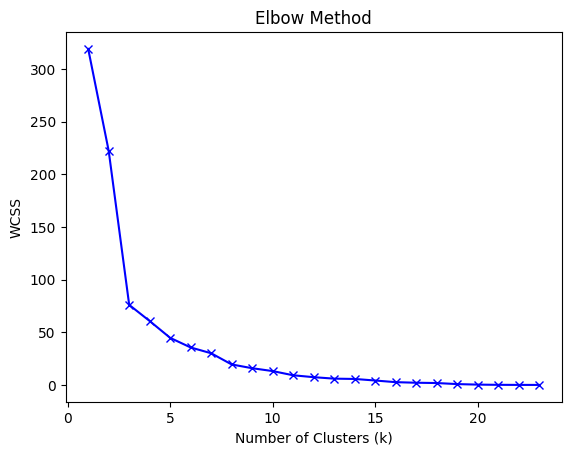

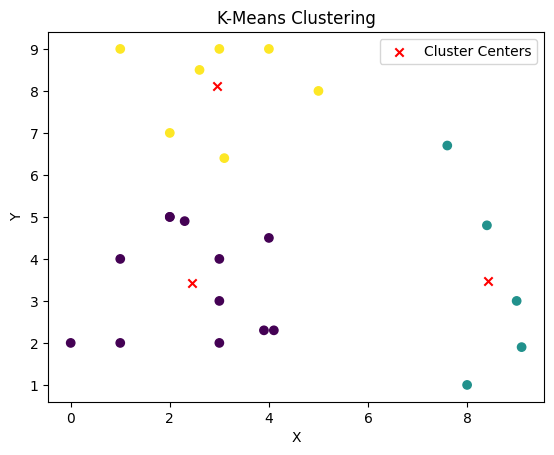

In [16]:
# 1. K-means clustering using sklearn.cluster library
# Data points
data = np.array([[1, 4], [2, 5], [1, 2], [4, 9], [0, 2], [9, 3], [3, 4], [2, 7], [3, 9], [1, 9], 
                 [5, 8], [3, 2], [2.3, 4.9], [3.1, 6.4], [4.1, 2.3], [2.6, 8.5], [3.9, 2.3],
                 [8, 1], [2, 5], [3, 3], [4, 4.5], [7.6, 6.7], [8.4, 4.8], [9.1, 1.9]])

# Function to calculate the within-cluster sum of squares (WCSS)
def compute_wcss(data, k):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(data)
    return kmeans.inertia_

wcss_values = []
key_values = range(1, 24)
for k in key_values:
    wcss_values.append(compute_wcss(data, k))
print(wcss_values)

# Plot the WCSS values to find the elbow point
plt.plot(key_values, wcss_values, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Based on the plot, select an appropriate value of k from where the decrease in wcss is less.
# Hence I am choosing k = 3 for this dataset as we can see from plot.

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(data)
labels = kmeans.labels_
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

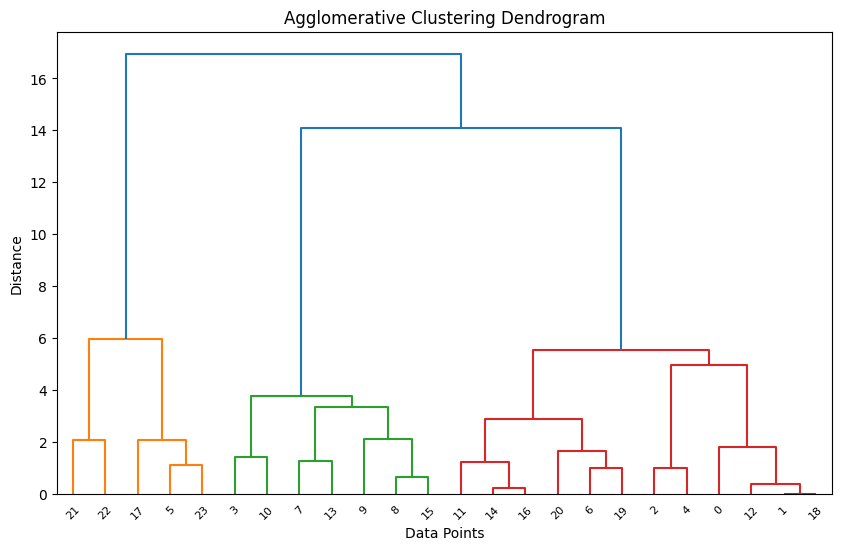

In [17]:
# 2. Hierarchial Clustering
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, metric='euclidean', linkage='ward')
clusters = model.fit_predict(data)

# Compute linkage matrix
linkage_matrix = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=np.arange(len(data)), leaf_font_size=8)
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Divide the points into different clusters
cluster_3 = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
clustering_labels_3 = fcluster(linkage_matrix, 3, criterion='maxclust')
cluster_3 = cluster_3.fit_predict(data)
cluster_4 = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean')
clustering_labels_4 = fcluster(linkage_matrix, 4, criterion='maxclust')
cluster_4 = cluster_4.fit_predict(data)
cluster_5 = AgglomerativeClustering(n_clusters=5, linkage='ward', metric='euclidean')
clustering_labels_5 = fcluster(linkage_matrix, 5, criterion='maxclust')
cluster_5 = cluster_5.fit_predict(data)
cluster_6 = AgglomerativeClustering(n_clusters=6, linkage='ward', metric='euclidean')
clustering_labels_6 = fcluster(linkage_matrix, 6, criterion='maxclust')
cluster_6 = cluster_6.fit_predict(data)
cluster_7 = AgglomerativeClustering(n_clusters=7, linkage='ward', metric='euclidean')
clustering_labels_7 = fcluster(linkage_matrix, 7, criterion='maxclust')
cluster_7 = cluster_7.fit_predict(data)

In [23]:
print("Cluster labels for 3 clusters: ")
print(cluster_3)
print('Cluster labels from dendrogram for 3 clusters: ')
print(clustering_labels_3)
print("Cluster labels for 4 clusters: ")
print(cluster_4)
print('Cluster labels from dendrogram for 4 clusters: ')
print(clustering_labels_4)
print("Cluster labels for 5 clusters: ")
print(cluster_5)
print('Cluster labels from dendrogram for 5 clusters: ')
print(clustering_labels_5)
print("Cluster labels for 6 clusters: ")
print(cluster_6)
print('Cluster labels from dendrogram for 6 clusters: ')
print(clustering_labels_6)
print("Cluster labels for 7 clusters: ")
print(cluster_7)
print('Cluster labels from dendrogram for 7 clusters: ')
print(clustering_labels_7)
# As we can see the labels of clusters we can see a one-one mapping between clusters division just there is change in label number but the points assigned remain same
# Hence we can say that we have correct clustering

Cluster labels for 3 clusters: 
[1 1 1 2 1 0 1 2 2 2 2 1 1 2 1 2 1 0 1 1 1 0 0 0]
Cluster labels from dendrogram for 3 clusters: 
[3 3 3 2 3 1 3 2 2 2 2 3 3 2 3 2 3 1 3 3 3 1 1 1]
Cluster labels for 4 clusters: 
[0 0 0 2 0 1 0 2 2 2 2 0 0 2 0 2 0 1 0 0 0 3 3 1]
Cluster labels from dendrogram for 4 clusters: 
[4 4 4 3 4 2 4 3 3 3 3 4 4 3 4 3 4 2 4 4 4 1 1 2]
Cluster labels for 5 clusters: 
[0 0 0 2 0 4 1 2 2 2 2 1 0 2 1 2 1 4 0 1 1 3 3 4]
Cluster labels from dendrogram for 5 clusters: 
[5 5 5 3 5 2 4 3 3 3 3 4 5 3 4 3 4 2 5 4 4 1 1 2]
Cluster labels for 6 clusters: 
[2 2 5 0 5 4 1 0 0 0 0 1 2 0 1 0 1 4 2 1 1 3 3 4]
Cluster labels from dendrogram for 6 clusters: 
[6 6 5 3 5 2 4 3 3 3 3 4 6 3 4 3 4 2 6 4 4 1 1 2]
Cluster labels for 7 clusters: 
[2 2 5 6 5 4 1 0 0 0 6 1 2 0 1 0 1 4 2 1 1 3 3 4]
Cluster labels from dendrogram for 7 clusters: 
[7 7 6 3 6 2 5 4 4 4 3 5 7 4 5 4 5 2 7 5 5 1 1 2]


[2 2 1 2 1 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 4 3 3]


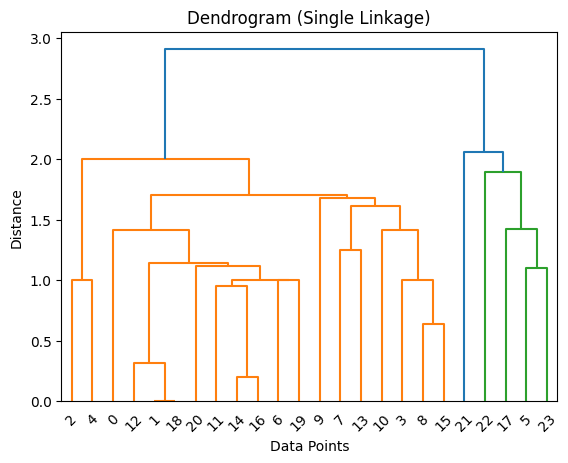

[4 4 4 3 4 2 4 3 3 3 3 4 4 3 4 3 4 2 4 4 4 1 1 2]


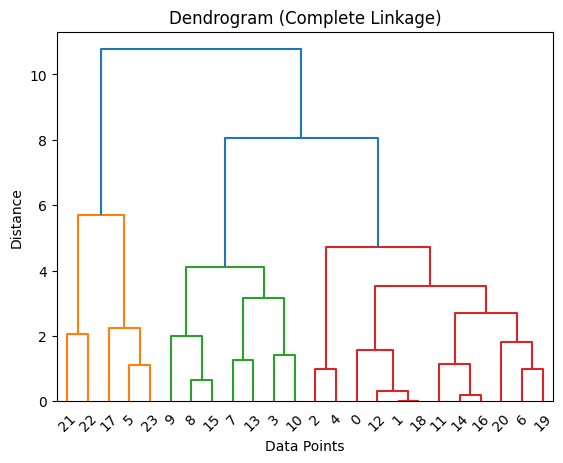

[4 4 4 3 4 2 4 3 3 3 3 4 4 3 4 3 4 2 4 4 4 1 1 2]


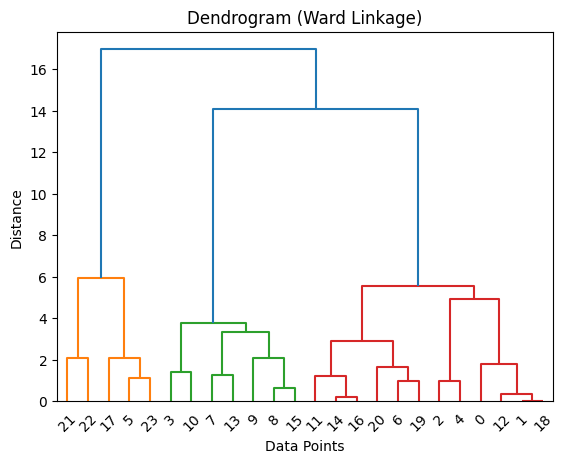

In [27]:
methods = ['single', 'complete', 'ward']
for i in methods:
    linkage_matrix = linkage(data, method=i)
    plt.figure()
    dendrogram(linkage_matrix)
    labels = fcluster(linkage_matrix, 4, criterion='maxclust')
    print(labels)
    plt.title(f"Dendrogram ({i.capitalize()} Linkage)")
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()
# As we can see that method of linkage if it is complete or ward then the labels are same but different for single linkage method.   

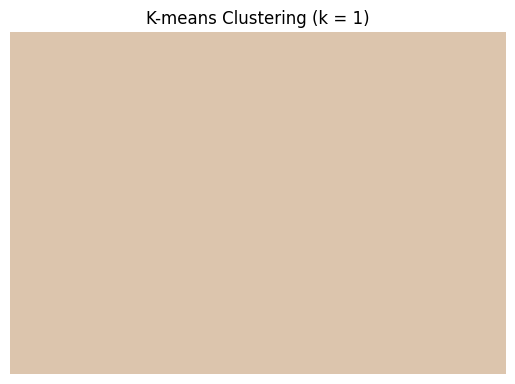

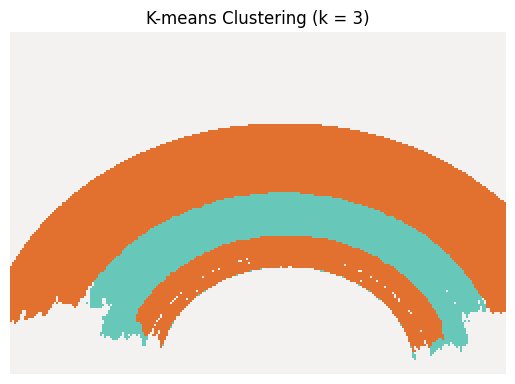

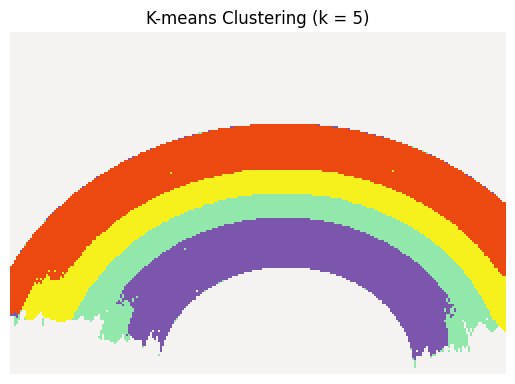

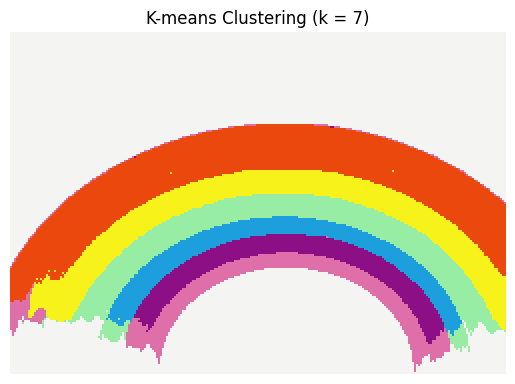

In [6]:
# 3. Image Segmentation using k-means clustering
image = cv2.imread('example.jpg')
image_data = image.reshape(-1, 3).astype(np.float32) / 255.0

k_values = [1, 3, 5, 7]
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=0)
    labels = kmeans.fit_predict(image_data)
    segmented_data = kmeans.cluster_centers_[labels]
    segmented_image = segmented_data.reshape(image.shape).astype(np.float32)
    plt.figure()
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.title(f'K-means Clustering (k = {k})')
    plt.axis('off')
plt.show()